In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(train_images, train_labels),(test_images, test_labels) = keras.datasets.mnist.load_data()

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
print(train_labels.shape)
print(test_labels.shape)

(60000,)
(10000,)


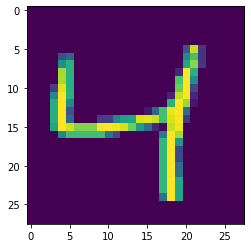

In [ ]:
plt.imshow(train_images[2])

In [ ]:
train_images = train_images / 0.255
test_images = test_images / 0.255

In [ ]:
train_images = np.expand_dims(train_images, -1)
train_labels = np.expand_dims(train_labels, -1)

In [ ]:
test_images = np.expand_dims(test_images, -1)
test_labels = np.expand_dims(test_labels, -1)

In [ ]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28, 1)
(60000, 1)


In [ ]:
def create_model(input_shape, n_classes):
  model = Sequential()

  model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape = input_shape,))
  model.add(Conv2D(32,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  return model

In [ ]:
model = create_model(input_shape=(28,28,1), n_classes=10)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)         

In [ ]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(train_images,train_labels,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5022 - accuracy: 0.8646
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1187 - accuracy: 0.9670
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0976 - accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0868 - accuracy: 0.9757
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0757 - accuracy: 0.9787
